# Full Machine Learning Project

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## 2. Load Data

In [2]:
df = pd.read_csv ('customer_churn_business_dataset.csv')
df

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_09996,Female,67,Germany,Sydney,SME,37,Web,Yearly,15,...,34.240174,Service,4.0,1,0.36,0.28,20,Satisfied,2,0
9996,CUST_09997,Male,26,USA,Toronto,Individual,42,Mobile,Yearly,13,...,40.092087,NaN,4.0,0,0.48,0.06,28,Unsatisfied,2,0
9997,CUST_09998,Female,18,Canada,Sydney,Individual,39,Mobile,Yearly,15,...,25.215810,Technical,1.0,0,0.11,0.07,-30,Satisfied,1,0
9998,CUST_09999,Female,30,USA,Delhi,Individual,52,Web,Monthly,14,...,20.544921,NaN,2.0,0,0.25,0.31,58,Neutral,1,1


## 3. Data Inspection

In [3]:
df.head(1)

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.35436,Service,4.0,0,0.71,0.4,27,Satisfied,1,0


In [4]:
df.tail(1)

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
9999,CUST_10000,Male,67,UK,Berlin,SME,7,Mobile,Monthly,15,...,23.536914,Technical,4.0,1,0.4,0.3,1,Satisfied,1,0


In [5]:
df.shape

(10000, 32)

In [6]:
df.columns

Index(['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment',
       'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins',
       'weekly_active_days', 'avg_session_time', 'features_used',
       'usage_growth_rate', 'last_login_days_ago', 'monthly_fee',
       'total_revenue', 'payment_method', 'payment_failures',
       'discount_applied', 'price_increase_last_3m', 'support_tickets',
       'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations',
       'email_open_rate', 'marketing_click_rate', 'nps_score',
       'survey_response', 'referral_count', 'churn'],
      dtype='object')

In [7]:
df['churn'].value_counts()

churn
0    8979
1    1021
Name: count, dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

In [9]:
numeric_col = ['age', 'tenure_months', 'monthly_logins', 'weekly_active_days', 'avg_session_time',
                'features_used','usage_growth_rate', 'last_login_days_ago', 'monthly_fee','total_revenue', 
                'payment_failures','support_tickets', 'avg_resolution_time', 'email_open_rate', 'marketing_click_rate',
                'csat_score','escalations', 'nps_score','referral_count', 'churn']

object_col = ['gender', 'country', 'city', 'customer_segment', 'signup_channel', 
              'contract_type', 'payment_method','discount_applied', 'price_increase_last_3m','complaint_type',
              'survey_response' ]

In [10]:
for i in numeric_col:
    print(df[i].unique(),i)
    print('*'*100)

[68 57 24 49 65 36 23 37 44 70 60 54 22 28 32 20 40 26 46 34 43 38 25 74
 55 59 41 52 72 31 27 29 61 63 51 58 48 18 56 21 30 39 35 19 53 71 67 47
 73 50 45 69 42 64 66 33 62] age
****************************************************************************************************
[22  9 58 19 52 54  7 15 17 46 14 41 48  2  4  3 11  5 55 29 28 23 30 51
 43 12 27 59 40 49 47 44 38 16 32  1 35 36 21  8 26 57 13 24 53 50 20 33
 18 10 25 56 39  6 34 45 31 42 37] tenure_months
****************************************************************************************************
[26  7 19 34 20  1 21 17 29 18 31 24 28 32 14  9 22 23  3 27 33  0 15 10
  6 13  5 12 25  4 46 36 42 39 11 35 16  8 44 30 38 37 41 43  2 50 40 47
 45 51 49 48 54] monthly_logins
****************************************************************************************************
[7 5 6 3 4 2 0 1] weekly_active_days
****************************************************************************************************
[11.762

In [11]:
for i in object_col:
    print(df[i].unique(),i)
    print('*'*100)
    print(df[i].value_counts(),i)
    print('*'*100)

['Male' 'Female'] gender
****************************************************************************************************
gender
Male      5013
Female    4987
Name: count, dtype: int64 gender
****************************************************************************************************
['Bangladesh' 'Canada' 'Germany' 'Australia' 'India' 'USA' 'UK'] country
****************************************************************************************************
country
Bangladesh    1494
Canada        1488
USA           1442
India         1427
Australia     1400
UK            1382
Germany       1367
Name: count, dtype: int64 country
****************************************************************************************************
['London' 'Sydney' 'New York' 'Dhaka' 'Delhi' 'Toronto' 'Berlin'] city
****************************************************************************************************
city
London      1518
Sydney      1471
Dhaka       1459
Delhi       1402
Berlin  

## 4. Null Value Handling

In [12]:
df.isnull().sum()

customer_id                  0
gender                       0
age                          0
country                      0
city                         0
customer_segment             0
tenure_months                0
signup_channel               0
contract_type                0
monthly_logins               0
weekly_active_days           0
avg_session_time             0
features_used                0
usage_growth_rate            0
last_login_days_ago          0
monthly_fee                  0
total_revenue                0
payment_method               0
payment_failures             0
discount_applied             0
price_increase_last_3m       0
support_tickets              0
avg_resolution_time          0
complaint_type            2045
csat_score                   0
escalations                  0
email_open_rate              0
marketing_click_rate         0
nps_score                    0
survey_response              0
referral_count               0
churn                        0
dtype: i

In [13]:
df.isnull().sum() /len(df) * 100

customer_id                0.00
gender                     0.00
age                        0.00
country                    0.00
city                       0.00
customer_segment           0.00
tenure_months              0.00
signup_channel             0.00
contract_type              0.00
monthly_logins             0.00
weekly_active_days         0.00
avg_session_time           0.00
features_used              0.00
usage_growth_rate          0.00
last_login_days_ago        0.00
monthly_fee                0.00
total_revenue              0.00
payment_method             0.00
payment_failures           0.00
discount_applied           0.00
price_increase_last_3m     0.00
support_tickets            0.00
avg_resolution_time        0.00
complaint_type            20.45
csat_score                 0.00
escalations                0.00
email_open_rate            0.00
marketing_click_rate       0.00
nps_score                  0.00
survey_response            0.00
referral_count             0.00
churn   

In [14]:
df['complaint_type'].unique()

array(['Service', 'Billing', 'Technical', nan], dtype=object)

In [15]:
df['complaint_type'] = df['complaint_type'].fillna("No_Complaint")

In [16]:
df.isnull().sum() /len(df) * 100

customer_id               0.0
gender                    0.0
age                       0.0
country                   0.0
city                      0.0
customer_segment          0.0
tenure_months             0.0
signup_channel            0.0
contract_type             0.0
monthly_logins            0.0
weekly_active_days        0.0
avg_session_time          0.0
features_used             0.0
usage_growth_rate         0.0
last_login_days_ago       0.0
monthly_fee               0.0
total_revenue             0.0
payment_method            0.0
payment_failures          0.0
discount_applied          0.0
price_increase_last_3m    0.0
support_tickets           0.0
avg_resolution_time       0.0
complaint_type            0.0
csat_score                0.0
escalations               0.0
email_open_rate           0.0
marketing_click_rate      0.0
nps_score                 0.0
survey_response           0.0
referral_count            0.0
churn                     0.0
dtype: float64

In [17]:
df.drop("customer_id", axis=1, inplace=True)


## 5.

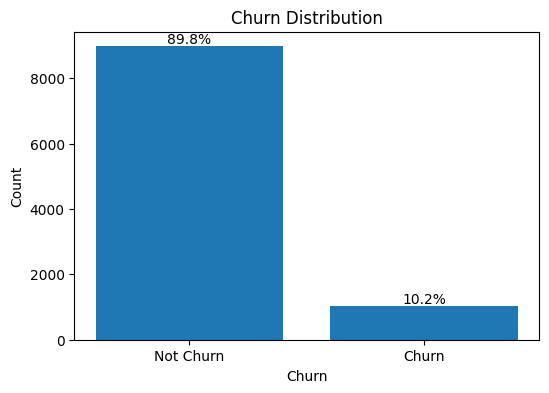

In [18]:
churn_counts = df['churn'].value_counts()
churn_percent = df['churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values)

for i, v in enumerate(churn_counts.values):
    plt.text(i, v, f"{churn_percent.iloc[i]:.1f}%", 
             ha='center', va='bottom', fontsize=10)

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0,1], ["Not Churn", "Churn"])
plt.show()

<Figure size 800x400 with 0 Axes>

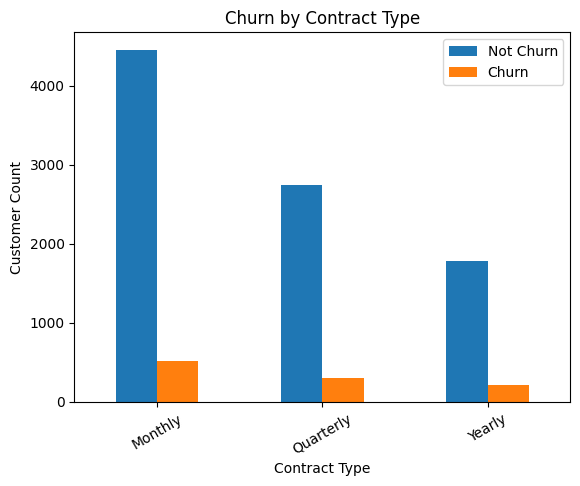

In [19]:
ct = pd.crosstab(df['contract_type'], df['churn'])

plt.figure(figsize=(8,4))
ct.plot(kind='bar')

plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=30)
plt.legend(["Not Churn", "Churn"])
plt.show()

<Figure size 1000x500 with 0 Axes>

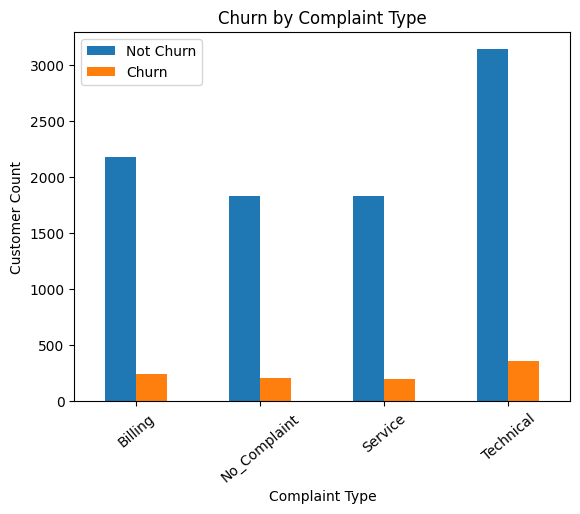

In [20]:
top_complaints = df['complaint_type'].value_counts().head(8).index

ct = pd.crosstab(df[df['complaint_type'].isin(top_complaints)]['complaint_type'],
                 df['churn'])

plt.figure(figsize=(10,5))
ct.plot(kind='bar')

plt.title("Churn by Complaint Type")
plt.xlabel("Complaint Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=40)
plt.legend(["Not Churn", "Churn"])
plt.show()

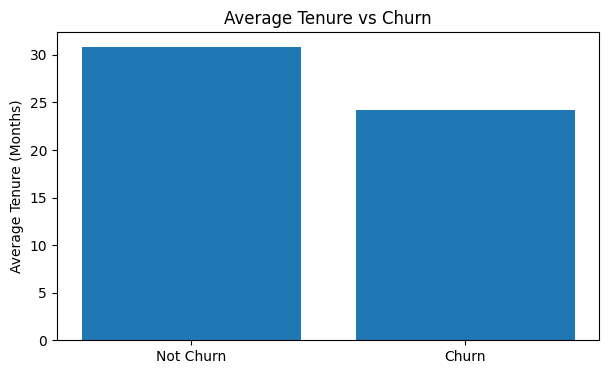

In [21]:
tenure_mean = df.groupby('churn')['tenure_months'].mean()

plt.figure(figsize=(7,4))
plt.bar(['Not Churn','Churn'], tenure_mean.values)
plt.title("Average Tenure vs Churn")
plt.ylabel("Average Tenure (Months)")
plt.show()

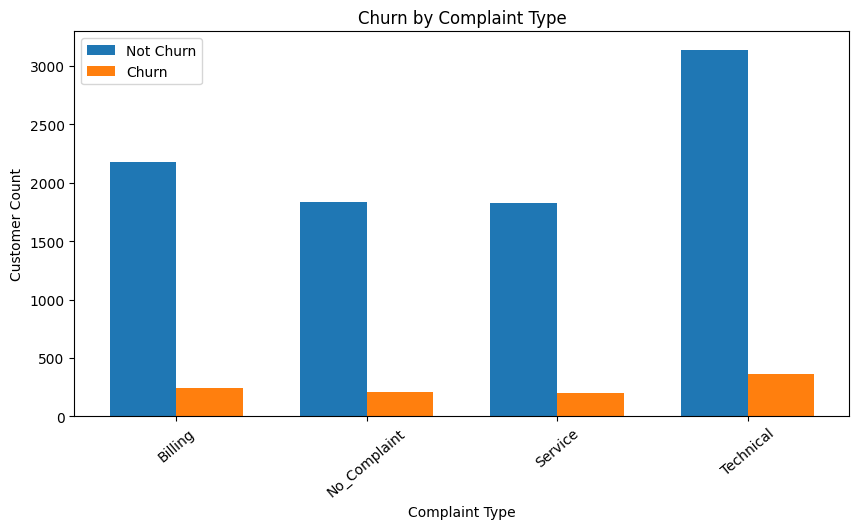

In [22]:
top_complaints = df['complaint_type'].value_counts().head(8).index
subset = df[df['complaint_type'].isin(top_complaints)]

ct = pd.crosstab(subset['complaint_type'], subset['churn'])

labels = ct.index
not_churn = ct[0]
churn = ct[1]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, not_churn, width, label="Not Churn")
plt.bar(x + width/2, churn, width, label="Churn")

plt.title("Churn by Complaint Type")
plt.xlabel("Complaint Type")
plt.ylabel("Customer Count")
plt.xticks(x, labels, rotation=40)
plt.legend()
plt.show()

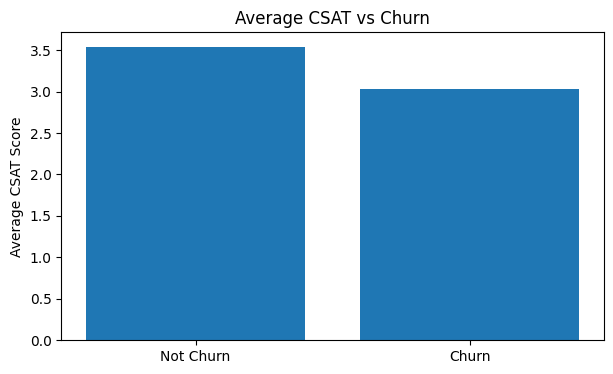

In [23]:
csat_mean = df.groupby('churn')['csat_score'].mean()

plt.figure(figsize=(7,4))
plt.bar(['Not Churn','Churn'], csat_mean.values)
plt.title("Average CSAT vs Churn")
plt.ylabel("Average CSAT Score")
plt.show()

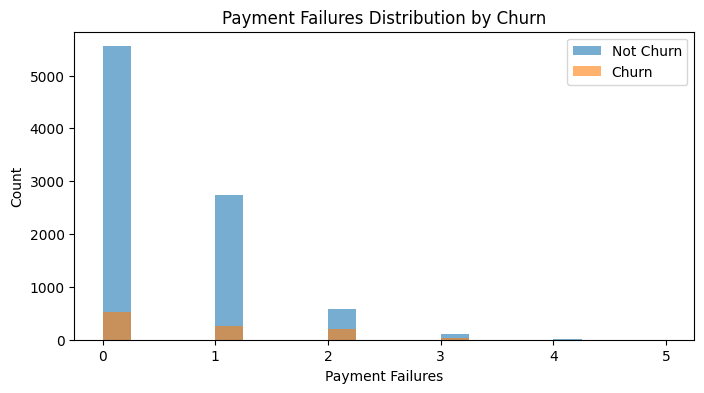

In [24]:
plt.figure(figsize=(8,4))
plt.hist(df[df['churn']==0]['payment_failures'], bins=20, alpha=0.6, label="Not Churn")
plt.hist(df[df['churn']==1]['payment_failures'], bins=20, alpha=0.6, label="Churn")

plt.title("Payment Failures Distribution by Churn")
plt.xlabel("Payment Failures")
plt.ylabel("Count")
plt.legend()
plt.show()

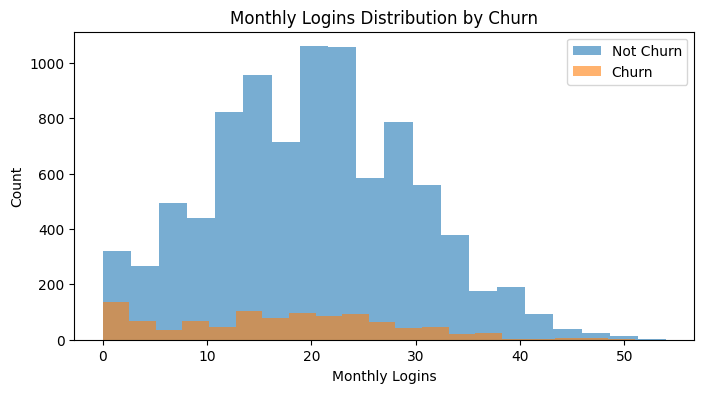

In [25]:
plt.figure(figsize=(8,4))
plt.hist(df[df['churn']==0]['monthly_logins'], bins=20, alpha=0.6, label="Not Churn")
plt.hist(df[df['churn']==1]['monthly_logins'], bins=20, alpha=0.6, label="Churn")

plt.title("Monthly Logins Distribution by Churn")
plt.xlabel("Monthly Logins")
plt.ylabel("Count")
plt.legend()
plt.show()

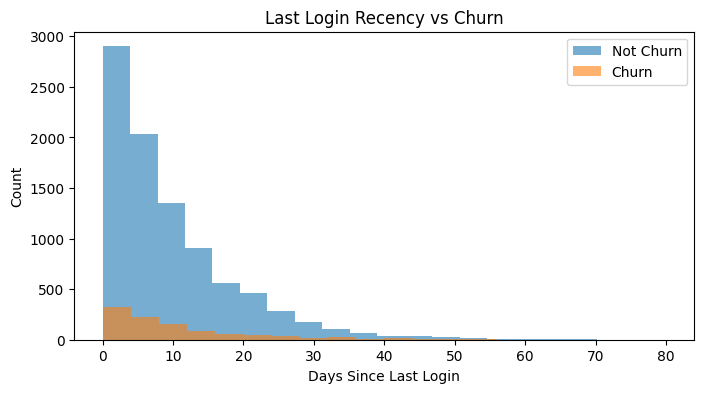

In [26]:
plt.figure(figsize=(8,4))
plt.hist(df[df['churn']==0]['last_login_days_ago'], bins=20, alpha=0.6, label="Not Churn")
plt.hist(df[df['churn']==1]['last_login_days_ago'], bins=20, alpha=0.6, label="Churn")

plt.title("Last Login Recency vs Churn")
plt.xlabel("Days Since Last Login")
plt.ylabel("Count")
plt.legend()
plt.show()

## 6. Correlation Heatmap

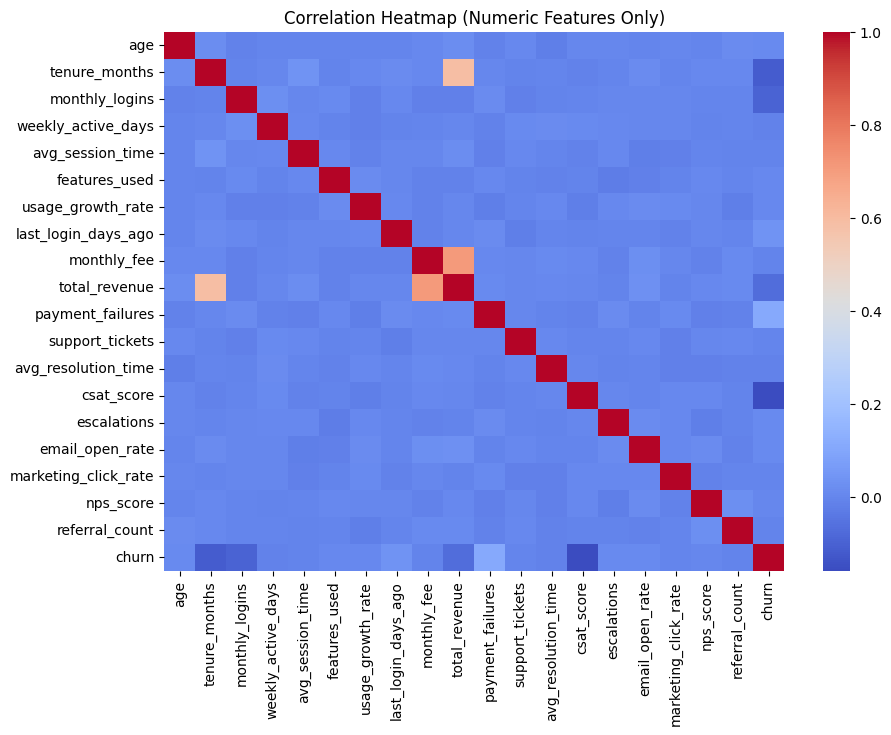

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

## 6. Outliers Check

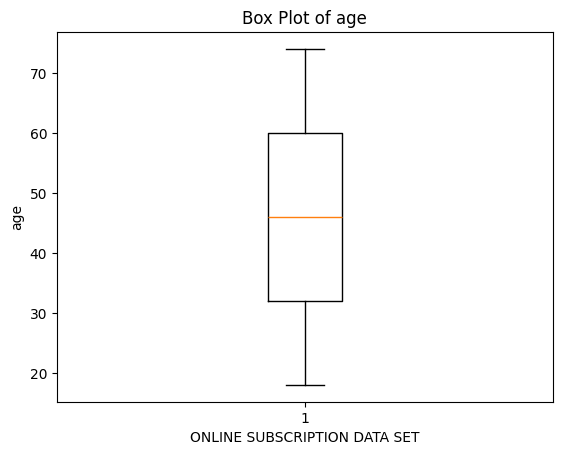

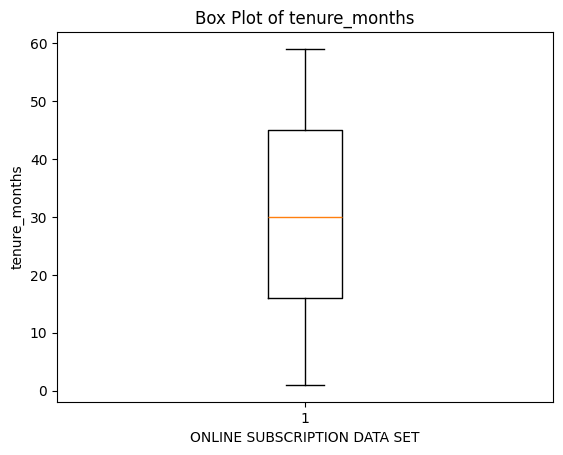

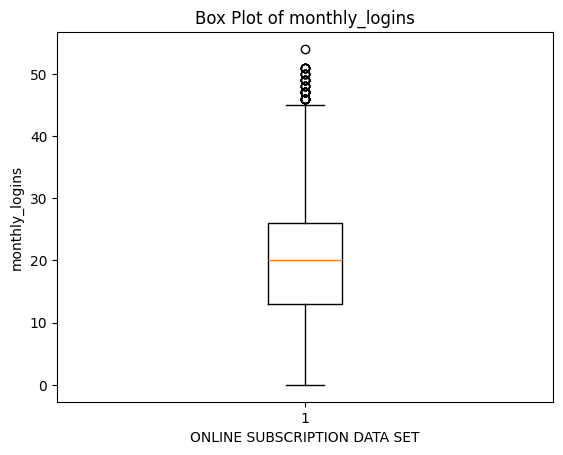

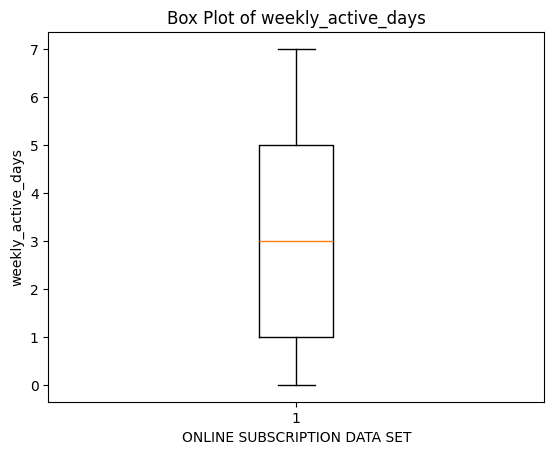

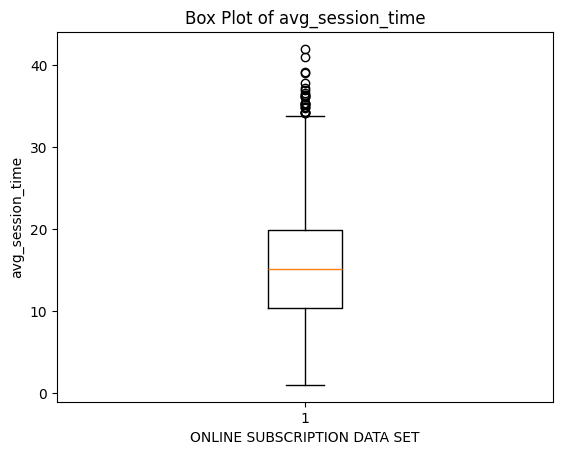

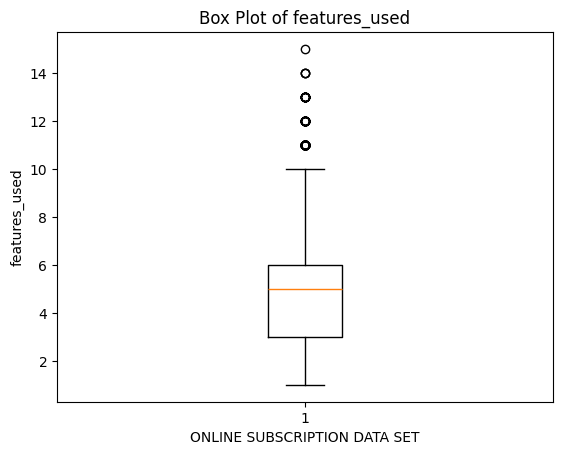

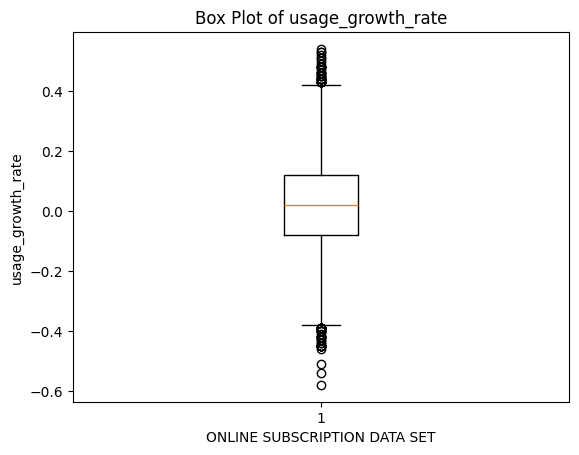

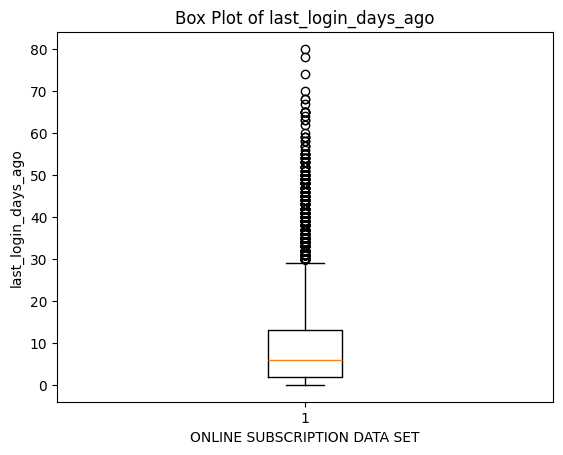

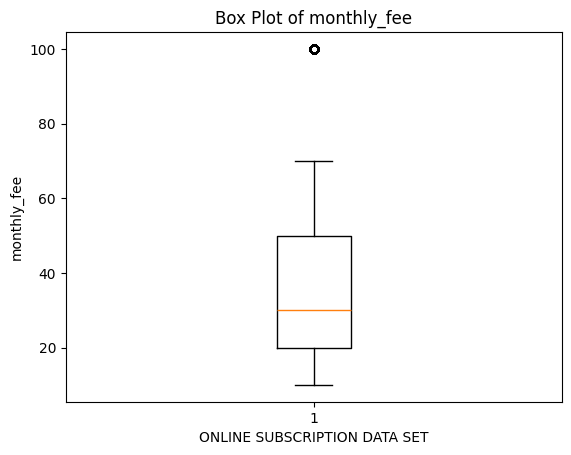

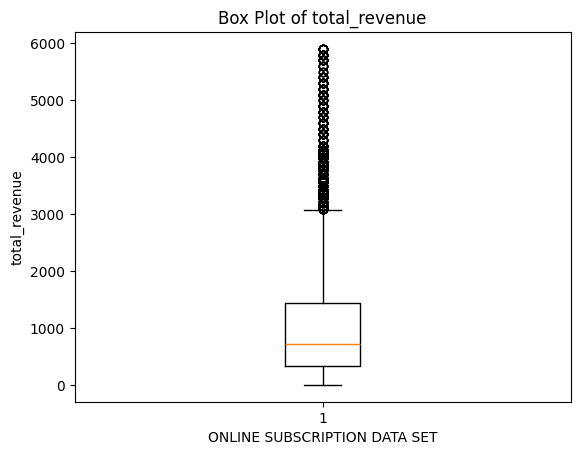

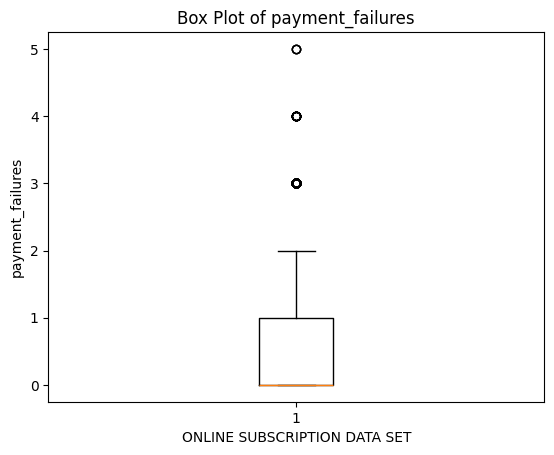

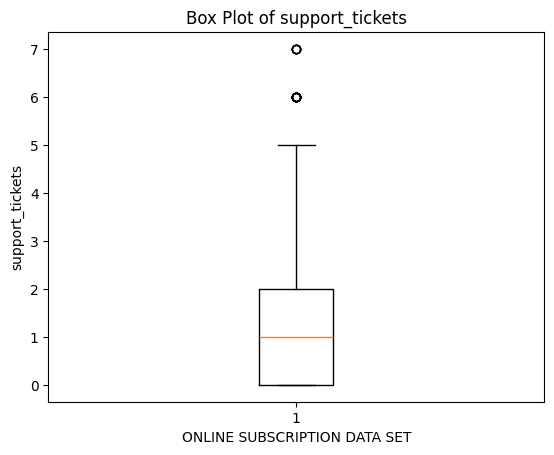

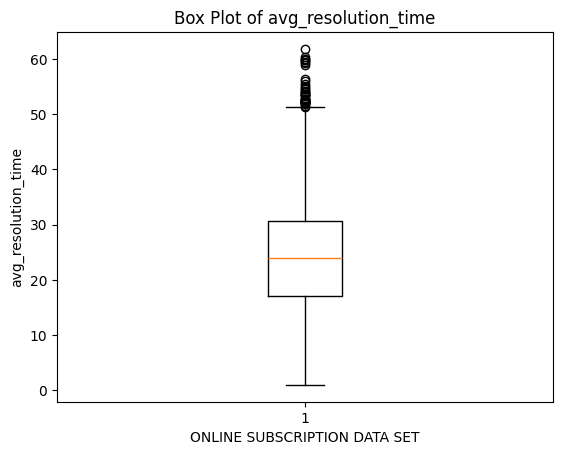

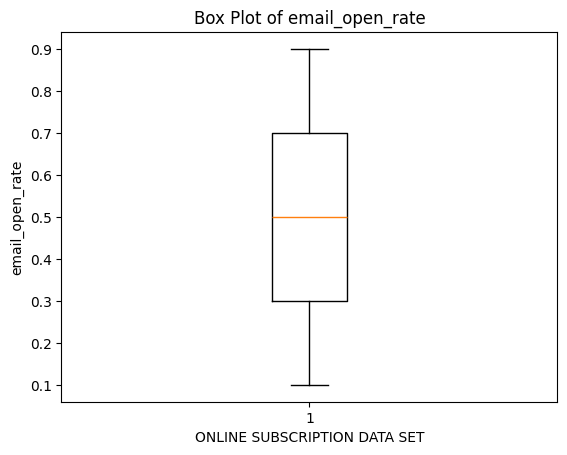

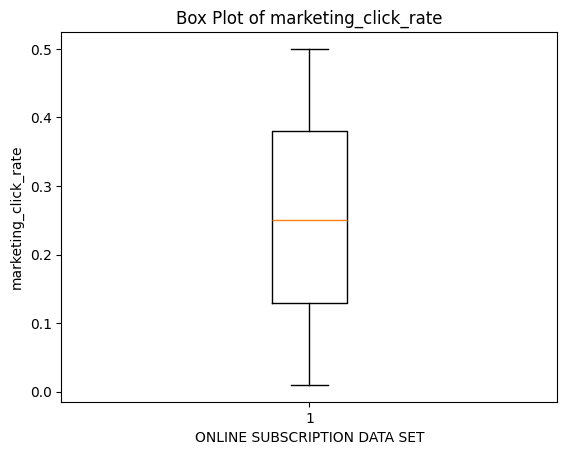

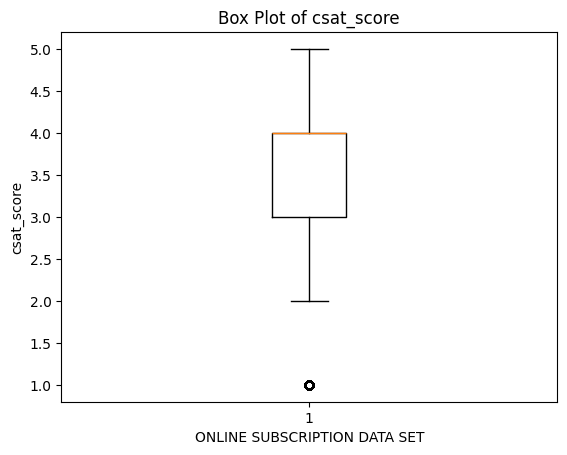

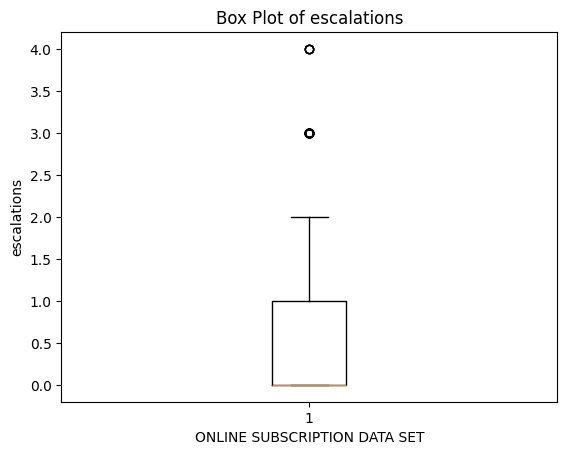

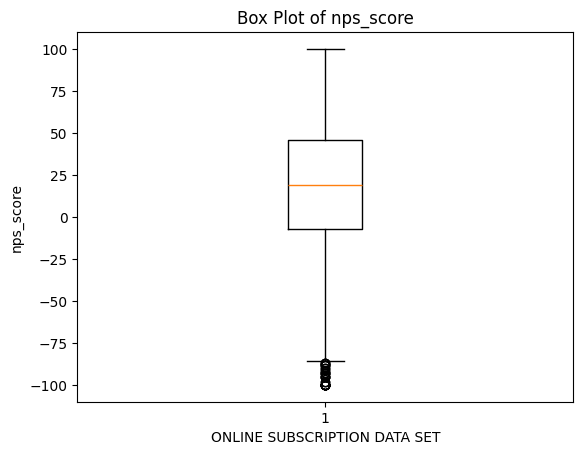

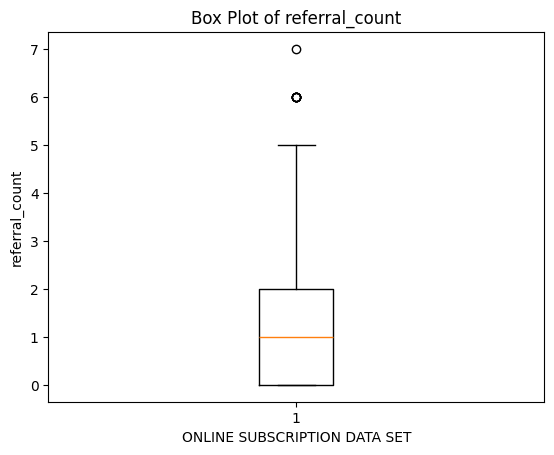

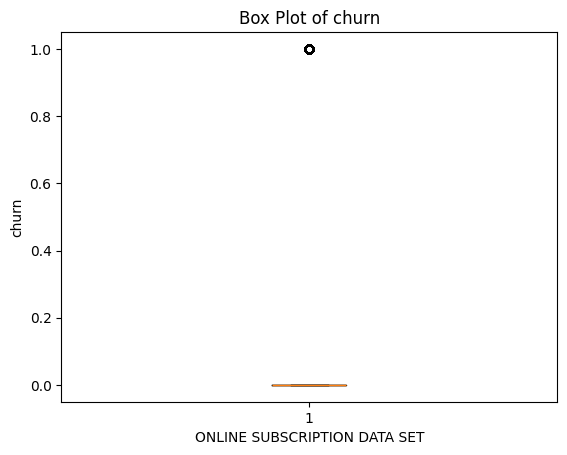

In [28]:
for i in numeric_col :
    plt.boxplot(df[i])
    plt.title(f'Box Plot of {i}')
    plt.ylabel(i)
    plt.xlabel('ONLINE SUBSCRIPTION DATA SET')
    plt.show()

In [29]:
col = ['monthly_logins','avg_session_time','features_used','usage_growth_rate','last_login_days_ago',
       'monthly_fee','total_revenue','payment_failures','csat_score','escalations',
       'nps_score','support_tickets','avg_resolution_time','referral_count']

for i in col :
    print(df[i].unique(),i)
    print('*'* 100)

[26  7 19 34 20  1 21 17 29 18 31 24 28 32 14  9 22 23  3 27 33  0 15 10
  6 13  5 12 25  4 46 36 42 39 11 35 16  8 44 30 38 37 41 43  2 50 40 47
 45 51 49 48 54] monthly_logins
****************************************************************************************************
[11.76237199 26.84638961 23.38006497 ... 22.08987856 23.54948718
 14.79354865] avg_session_time
****************************************************************************************************
[ 5  1  6  2  8  3  7  4  9 11 10 14 12 13 15] features_used
****************************************************************************************************
[ 0.06 -0.28  0.13 -0.17 -0.16 -0.15  0.23  0.22 -0.1   0.27  0.26  0.04
  0.34  0.    0.11 -0.08 -0.03 -0.11  0.05 -0.04 -0.05 -0.14  0.03  0.16
  0.24  0.36  0.07  0.08  0.09  0.2  -0.01 -0.07 -0.02  0.01  0.1   0.14
 -0.22 -0.06 -0.12  0.02 -0.13 -0.21  0.15  0.21 -0.25  0.32  0.31 -0.18
  0.3   0.12 -0.24 -0.2  -0.19 -0.09  0.18  0.25 -0.32  0.19  0.17 -0.

In [30]:
def check_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)][column]

    print(f"\n-------------------------------------------")
    print(f"Feature : {column}")
    print(f"Q1  : {Q1}")
    print(f"Q3  : {Q3}")
    print(f"IQR : {IQR}")
    print(f"Lower Bound : {lower}")
    print(f"Upper Bound : {upper}")
    print(f"Outlier Count : {outliers.shape[0]}")
    print(f"Unique Outlier Values : {sorted(outliers.unique())}" if len(outliers) > 0 else "No Outliers Found")
    print(f"-------------------------------------------")

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    check_outliers(col)



-------------------------------------------
Feature : age
Q1  : 32.0
Q3  : 60.0
IQR : 28.0
Lower Bound : -10.0
Upper Bound : 102.0
Outlier Count : 0
No Outliers Found
-------------------------------------------

-------------------------------------------
Feature : tenure_months
Q1  : 16.0
Q3  : 45.0
IQR : 29.0
Lower Bound : -27.5
Upper Bound : 88.5
Outlier Count : 0
No Outliers Found
-------------------------------------------

-------------------------------------------
Feature : monthly_logins
Q1  : 13.0
Q3  : 26.0
IQR : 13.0
Lower Bound : -6.5
Upper Bound : 45.5
Outlier Count : 49
Unique Outlier Values : [np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(54)]
-------------------------------------------

-------------------------------------------
Feature : weekly_active_days
Q1  : 1.0
Q3  : 5.0
IQR : 4.0
Lower Bound : -5.0
Upper Bound : 11.0
Outlier Count : 0
No Outliers Found
-------------------------------------------

-----------------

## 7.Encoding

In [31]:
one_gender = OneHotEncoder(sparse_output=False)
df1 = one_gender.fit_transform(df[['gender']])

df1 = pd.DataFrame(df1,columns=one_gender.get_feature_names_out())

In [32]:
one_country = OneHotEncoder(sparse_output=False)
df2 = one_country.fit_transform(df[['country']])

df2 = pd.DataFrame(df2,columns=one_country.get_feature_names_out())

In [33]:
one_city = OneHotEncoder(sparse_output=False)
df3 = one_city.fit_transform(df[['city']])

df3 = pd.DataFrame(df3,columns=one_city.get_feature_names_out())

In [34]:
one_customer_segment = OneHotEncoder(sparse_output=False)
df4 = one_customer_segment.fit_transform(df[['customer_segment']])

df4 = pd.DataFrame(df4,columns=one_customer_segment.get_feature_names_out())

In [35]:
one_signup_channel = OneHotEncoder(sparse_output=False)
df5 = one_signup_channel.fit_transform(df[['signup_channel']])

df5 = pd.DataFrame(df5,columns=one_signup_channel.get_feature_names_out())

In [36]:
one_contract_type = OneHotEncoder(sparse_output=False)
df6 = one_contract_type.fit_transform(df[['contract_type']])

df6 = pd.DataFrame(df6,columns=one_contract_type.get_feature_names_out())

In [37]:
one_payment_method = OneHotEncoder(sparse_output=False)
df7 = one_payment_method.fit_transform(df[['payment_method']])

df7 = pd.DataFrame(df7,columns=one_payment_method.get_feature_names_out())

In [38]:
one_discount_applied = OneHotEncoder(sparse_output=False)
df8 = one_discount_applied.fit_transform(df[['discount_applied']])

df8 = pd.DataFrame(df8,columns=one_discount_applied.get_feature_names_out())

In [39]:
one_price_increase_last_3m = OneHotEncoder(sparse_output=False)
df9 = one_price_increase_last_3m.fit_transform(df[['price_increase_last_3m']])

df9 = pd.DataFrame(df9,columns=one_price_increase_last_3m.get_feature_names_out())

In [40]:
one_complaint_type = OneHotEncoder(sparse_output=False)
df10 = one_complaint_type.fit_transform(df[['complaint_type']])

df10 = pd.DataFrame(df10,columns=one_complaint_type.get_feature_names_out())

In [41]:
one_survey_response = OneHotEncoder(sparse_output=False)
df11 = one_survey_response.fit_transform(df[['survey_response']])

df11= pd.DataFrame(df11,columns=one_survey_response.get_feature_names_out())

In [42]:
df0 = df

In [43]:
df = df.drop(columns=object_col, axis=1)

In [44]:
df = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis=1)
df.head(1)

,age,tenure_months,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,...,payment_method_Card,payment_method_PayPal,discount_applied_No,discount_applied_Yes,price_increase_last_3m_No,price_increase_last_3m_Yes,complaint_type_Billing,complaint_type_No_Complaint,complaint_type_Service,complaint_type_Technical
0,68,22,26,7,11.762372,5,0.06,7,30,660,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
cor_matrix = df.corr()['churn']
cor_matrix

age                             0.010155
tenure_months                  -0.117014
monthly_logins                 -0.098339
weekly_active_days             -0.008818
avg_session_time               -0.004659
features_used                   0.005435
usage_growth_rate               0.005276
last_login_days_ago             0.037250
monthly_fee                    -0.005048
total_revenue                  -0.070120
payment_failures                0.112494
support_tickets                 0.000317
avg_resolution_time            -0.009172
csat_score                     -0.157924
escalations                     0.009561
email_open_rate                 0.011506
marketing_click_rate           -0.002068
nps_score                       0.002996
referral_count                 -0.007323
churn                           1.000000
gender_Female                  -0.003417
gender_Male                     0.003417
country_Australia               0.008624
country_Bangladesh             -0.011616
country_Canada  

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           10000 non-null  int64  
 1   tenure_months                 10000 non-null  int64  
 2   monthly_logins                10000 non-null  int64  
 3   weekly_active_days            10000 non-null  int64  
 4   avg_session_time              10000 non-null  float64
 5   features_used                 10000 non-null  int64  
 6   usage_growth_rate             10000 non-null  float64
 7   last_login_days_ago           10000 non-null  int64  
 8   monthly_fee                   10000 non-null  int64  
 9   total_revenue                 10000 non-null  int64  
 10  payment_failures              10000 non-null  int64  
 11  support_tickets               10000 non-null  int64  
 12  avg_resolution_time           10000 non-null  float64
 13  cs

## 10. Train-Test Split

In [48]:
x = df.drop('churn', axis = 1)
y = df['churn']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=42,stratify= y)

## 11. SMOTE Balancing

In [49]:
df['churn'].value_counts()

churn
0    8979
1    1021
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
SMT = SMOTE(random_state=42)
x_train,y_train =   SMT.fit_resample(x_train,y_train)

In [51]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train = std.fit_transform (x_train)
x_test = std.transform(x_test)

In [52]:
KNN_MODEL = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    metric='minkowski',
    p=2
)


In [53]:
decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,       
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced' 
)


In [54]:
logistic_regression_model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

In [55]:
SVC_MODEL = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    class_weight='balanced',
    random_state=42
)

In [56]:
rfc_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  
)


In [57]:
adaboost_model = AdaBoostClassifier(
    estimator= decision_tree_model ,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

In [58]:
nb_model = GaussianNB()

In [59]:
models = {'knn model ':KNN_MODEL,
          'DECISION TREE MODEL':decision_tree_model,
            'logistic regression model' : logistic_regression_model,
             'SVC MODEL' : SVC_MODEL ,
             'Random forest model': rfc_model ,
             'Adaboost model ' : adaboost_model,
             'Gaussian Naive Bayes model' : nb_model}

In [60]:
good_fit_models = []

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
for name, model in models.items():

    model.fit(x_train,y_train)

    y_pred = model.predict (x_test)
    cm = confusion_matrix(y_test,y_pred)
    cl_report = classification_report(y_test,y_pred)
    test_accuracy = accuracy_score (y_test,y_pred)

    print('confusion matrix of test data of',name,'is : ')
    print(cm)
    print('classification report of test data of',name,'is : ')
    print(cl_report)
    print('test accuracy is : ',test_accuracy)

    y_train_pred = model.predict (x_train)
    cm1 = confusion_matrix(y_train,y_train_pred)
    cl_report1 = classification_report(y_train,y_train_pred)
    train_accuracy = accuracy_score (y_train,y_train_pred)

    print('confusion matrix of test data of',name,'is : ')
    print(cm1)
    print('classification report of test data of',name,'is : ')
    print(cl_report1)
    print('train accuracy is : ',train_accuracy)

    if train_accuracy > test_accuracy+.1:
        print('the',name,'is over fit')
    elif train_accuracy < .6:
        print('the',name,'is undr fit')
    else :
        print('the',name,'is good fit')
        good_fit_models.append(name)

    print('*'*100)

print(good_fit_models)
    

confusion matrix of test data of knn model  is : 
[[ 849 1396]
 [  77  178]]
classification report of test data of knn model  is : 
              precision    recall  f1-score   support

           0       0.92      0.38      0.54      2245
           1       0.11      0.70      0.19       255

    accuracy                           0.41      2500
   macro avg       0.51      0.54      0.37      2500
weighted avg       0.83      0.41      0.50      2500

test accuracy is :  0.4108
confusion matrix of test data of knn model  is : 
[[6734    0]
 [   0 6734]]
classification report of test data of knn model  is : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6734
           1       1.00      1.00      1.00      6734

    accuracy                           1.00     13468
   macro avg       1.00      1.00      1.00     13468
weighted avg       1.00      1.00      1.00     13468

train accuracy is :  1.0
the knn model  is over fit
***

c:\Users\user\Desktop\ML PROJECT\CUSTOMER CHARN PREDICTION FOR ONLINE SUBSCRIPTION\charn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


confusion matrix of test data of SVC MODEL is : 
[[2201   44]
 [ 242   13]]
classification report of test data of SVC MODEL is : 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2245
           1       0.23      0.05      0.08       255

    accuracy                           0.89      2500
   macro avg       0.56      0.52      0.51      2500
weighted avg       0.83      0.89      0.85      2500

test accuracy is :  0.8856
confusion matrix of test data of SVC MODEL is : 
[[6716   18]
 [ 239 6495]]
classification report of test data of SVC MODEL is : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6734
           1       1.00      0.96      0.98      6734

    accuracy                           0.98     13468
   macro avg       0.98      0.98      0.98     13468
weighted avg       0.98      0.98      0.98     13468

train accuracy is :  0.9809177309177309
the SVC MODEL is go

In [63]:
good_fit_models

['logistic regression model', 'SVC MODEL', 'Gaussian Naive Bayes model']

## hyper parameter tuning

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform

log_reg = LogisticRegression(
    max_iter=3000,
    class_weight='balanced',
    n_jobs=-1)

param_dist_lr = {
    "C": loguniform(1e-3, 10),      
    "solver": ["liblinear", "lbfgs"],
    "penalty": ["l2"]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


randomLR = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist_lr,
    n_iter=30,                      
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1 )


randomLR.fit(x_train, y_train)

print("Best Params:", randomLR.best_params_)
print("Best CV ROC-AUC:", randomLR.best_score_)

y_pred_lr = randomLR.predict(x_test)
y_prob_lr = randomLR.predict_proba(x_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("\nTest ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\user\Desktop\ML PROJECT\CUSTOMER CHARN PREDICTION FOR ONLINE SUBSCRIPTION\charn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\user\Desktop\ML PROJECT\CUSTOMER CHARN PREDICTION FOR ONLINE SUBSCRIPTION\charn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Best Params: {'C': np.float64(0.24810409748678125), 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.7857554469963074

Test ROC-AUC: 0.6442342460369448

Confusion Matrix:
 [[1552  693]
 [ 128  127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79      2245
           1       0.15      0.50      0.24       255

    accuracy                           0.67      2500
   macro avg       0.54      0.59      0.51      2500
weighted avg       0.85      0.67      0.73      2500



In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from scipy.stats import reciprocal

svc = SVC(
    probability=True,          
    class_weight='balanced',  
    cache_size=2000,           
    random_state=42 )


param_dist_svc = {
    "C": reciprocal(0.1, 5),        
    "gamma": ["scale", "auto"],      
    "kernel": ["rbf"]                }

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

randomSVC = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist_svc,
    n_iter=10,              
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1 )

randomSVC.fit(x_train, y_train)

print("Best Params:", randomSVC.best_params_)
print("Best CV ROC-AUC:", randomSVC.best_score_)

y_pred_svc = randomSVC.predict(x_test)
y_prob_svc = randomSVC.predict_proba(x_test)[:,1]

print("\nTest ROC-AUC:", roc_auc_score(y_test, y_prob_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'C': np.float64(2.595942550311263), 'gamma': 'auto', 'kernel': 'rbf'}
Best CV ROC-AUC: 0.9929723485070637

Test ROC-AUC: 0.6469234464387091

Confusion Matrix:
 [[2186   59]
 [ 238   17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2245
           1       0.22      0.07      0.10       255

    accuracy                           0.88      2500
   macro avg       0.56      0.52      0.52      2500
weighted avg       0.83      0.88      0.85      2500



In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from scipy.stats import loguniform

nb_model = GaussianNB()

param_dist_nb = {
    "var_smoothing": loguniform(1e-9, 1e-1)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

randomNB = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_dist_nb,
    n_iter=20,                
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    verbose=2,
    n_jobs=-1)

randomNB.fit(x_train, y_train)

print("Best Params:", randomNB.best_params_)
print("Best CV ROC-AUC:", randomNB.best_score_)

y_pred_nb = randomNB.predict(x_test)
y_prob_nb = randomNB.predict_proba(x_test)[:,1]

print("\nTest ROC-AUC:", roc_auc_score(y_test, y_prob_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'var_smoothing': np.float64(0.05744851636320414)}
Best CV ROC-AUC: 0.8924195102012256

Test ROC-AUC: 0.5627424778374601

Confusion Matrix:
 [[1688  557]
 [ 176   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      2245
           1       0.12      0.31      0.18       255

    accuracy                           0.71      2500
   macro avg       0.51      0.53      0.50      2500
weighted avg       0.83      0.71      0.76      2500



## best model

In [ ]:
##